#Plotting Sigmoid Function

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

$S_{w,b}(x) = \frac{1}{1 + e^{-(wx+b)}}$

In [ ]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [ ]:
sigmoid(1,0.5,0)

0.6224593312018546

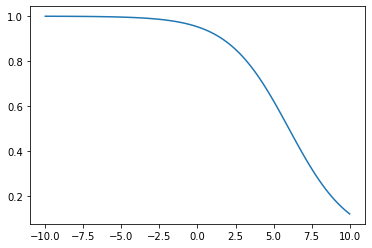

In [ ]:
w = -0.5        #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -1.1           #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 +b)}}$

In [ ]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return  1/(1 + np.exp(-(w1*x1 + w2*x2 +b)))

In [ ]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [ ]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [ ]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

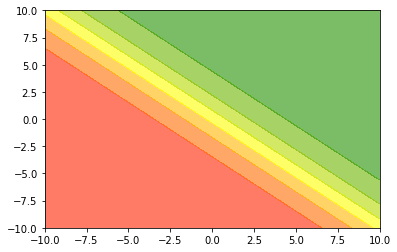

In [ ]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

Text(0.5, 0, 'y')

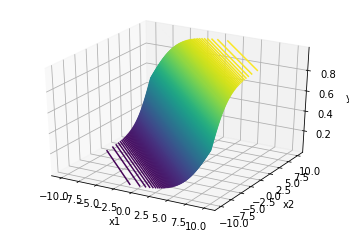

In [ ]:
fig = plt.figure()
ax =plt.axes(projection = '3d')
ax.contour3D(XX1, XX2, Y, 300, cmap = 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

Text(0.5, 0, 'y')

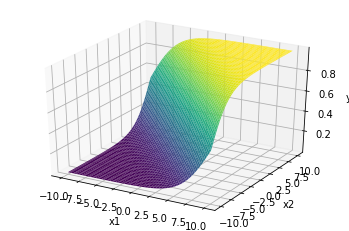

In [ ]:
fig = plt.figure()
ax =plt.axes(projection = '3d')
ax.plot_surface(XX1, XX2, Y, cmap = 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

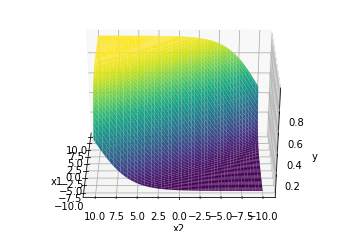

In [ ]:
fig = plt.figure()
ax =plt.axes(projection = '3d')
ax.plot_surface(XX1, XX2, Y, cmap = 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30,180)

#Compute Loss For Given Function

In [ ]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

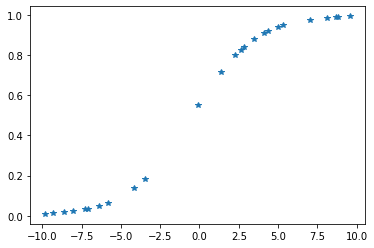

In [ ]:
plt.plot(X,Y, '*')
plt.show()

In [ ]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(x, w_est, b_est)) ** 2
  return loss

In [ ]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [ ]:
WW.shape

(101, 101)

In [ ]:
for i in range (WW.shape[0]):
  for j in range (WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i,j], BB[i,j])

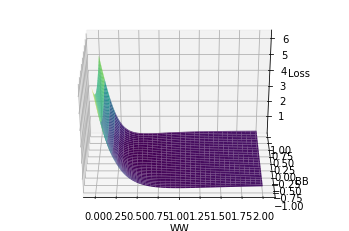

In [ ]:
fig = plt.figure()
ax =plt.axes(projection = '3d')
ax.plot_surface(WW, BB, Loss, cmap = 'viridis')
ax.set_xlabel('WW')
ax.set_ylabel('BB')
ax.set_zlabel('Loss')

ax.view_init(30,270)

In [ ]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = ij - i * Loss.shape[1]
print(i,j)

63 25


In [ ]:
print(WW[i, j], BB[i, j])

0.5 0.26


#Class For Sigmoid Neuron

In [ ]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialize = True, display_loss = False):

    #initialize w, b
    if initialize:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epochs"):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)

      self.w -= learning_rate * dw
      self.b -= learning_rate * db

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self,X):
    Y_pred  = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

#Fit the toy Data

In [ ]:
X = np.array([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5]])
Y = [1, 1, 1, 0, 0, 0]

In [ ]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [ ]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY, cmap = my_cmap, alpha = 0.6)
  ax.scatter(X[:,0], X[:,1], c = Y, cmap = my_cmap)
  ax.plot()


[[-0.75865798  1.07462558]] [0.01714937]



[[-0.53010879  1.11866524]] [0.05534179]



[[-0.27534632  1.06178659]] [0.07137789]



[[0.19165592 0.88988742]] [0.08940528]



[[0.93109955 0.52963846]] [0.0946538]



[[1.05088189 0.00906781]] [0.17480987]



[[ 1.01307417 -0.57401855]] [0.09657729]



[[ 1.29365458 -0.14033514]] [0.00715933]



[[ 1.21844968 -0.70014639]] [-0.09921806]



[[ 1.50011702 -0.23140001]] [-0.17712752]



[[ 1.42196391 -0.73161002]] [-0.27631953]



[[ 1.64099183 -0.36149194]] [-0.34198273]



[[ 1.5967173  -0.66892215]] [-0.41035603]



[[ 1.70333029 -0.50644731]] [-0.44951905]



[[ 1.71039091 -0.59080477]] [-0.48504931]


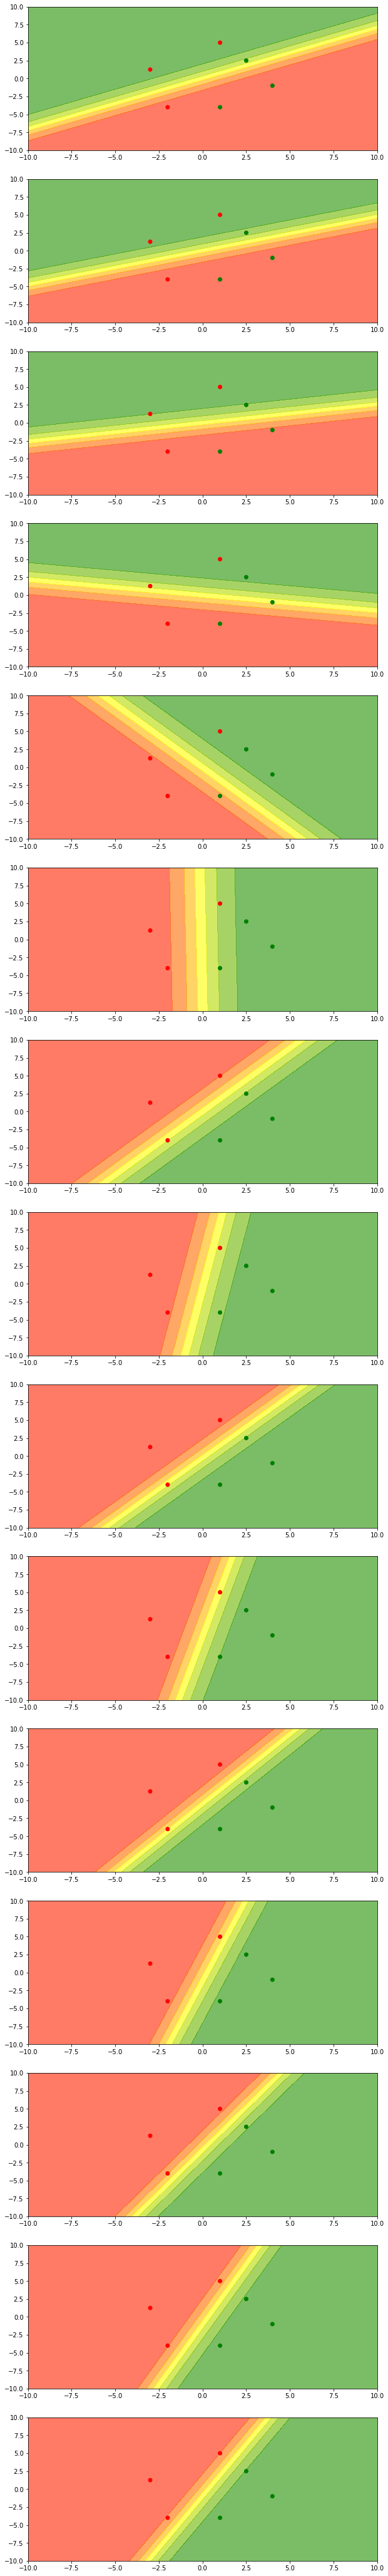

In [ ]:
sn.fit(X, Y, 1, 0.25, True)
N = 15
plt.figure(figsize = (10,5*N))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.75, False)

#Load Data

In [ ]:
!ls

mobile_cleaned.csv  sample_data


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('mobile_cleaned.csv')

In [ ]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [ ]:
data.shape

(341, 88)

In [ ]:
X = data.drop('Rating', axis = 1)

In [ ]:
Y = data['Rating'].values

In [ ]:
X.head

<bound method NDFrame.head of      PhoneId  Pixel Density  Screen Size  ...  Sim1_2G  Sim1_3G  Sim1_4G
0          0            403         6.26  ...        0        0        1
1          1            271         6.20  ...        0        0        1
2          2            409         6.30  ...        0        0        1
3          4            411         6.00  ...        0        0        1
4          5            396         6.50  ...        0        0        1
..       ...            ...          ...  ...      ...      ...      ...
336      465            220         5.00  ...        0        0        1
337      466            401         5.50  ...        0        0        1
338      468            282         5.20  ...        0        0        1
339      470            218         4.50  ...        0        0        1
340      472            401         5.50  ...        0        0        1

[341 rows x 87 columns]>

In [ ]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [ ]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [ ]:
data['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [ ]:
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [ ]:
Y_binarized = data['Class'].values

##Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
R = np.random.random([100,1])

In [ ]:
R

array([[0.35759999],
       [0.30674332],
       [0.89591126],
       [0.29096986],
       [0.3854162 ],
       [0.3656479 ],
       [0.1965327 ],
       [0.15083104],
       [0.03046069],
       [0.4264779 ],
       [0.12925759],
       [0.63435995],
       [0.22792493],
       [0.14301896],
       [0.06125171],
       [0.98612106],
       [0.20542278],
       [0.04709033],
       [0.55516214],
       [0.88160027],
       [0.30039815],
       [0.2063832 ],
       [0.3534641 ],
       [0.71476823],
       [0.98880262],
       [0.80884804],
       [0.44264238],
       [0.43526889],
       [0.39830745],
       [0.49897375],
       [0.44057878],
       [0.18065056],
       [0.66619223],
       [0.58337596],
       [0.1177326 ],
       [0.47608909],
       [0.31224249],
       [0.73893199],
       [0.86580458],
       [0.4625702 ],
       [0.92840995],
       [0.16734669],
       [0.36886259],
       [0.92098792],
       [0.869497  ],
       [0.54506425],
       [0.31823556],
       [0.005

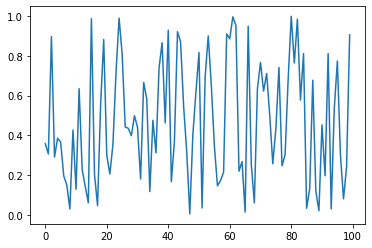

In [ ]:
plt.plot(R)
plt.show()

In [ ]:
np.mean(R)

0.4725620391342937

In [ ]:
np.std(R)

0.3013283203680013

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.mean_

array([0.47256204])

In [ ]:
RT = scaler.transform(R)

In [ ]:
np.mean(RT)

-2.575717417130363e-16

In [ ]:
np.std(RT)

1.0

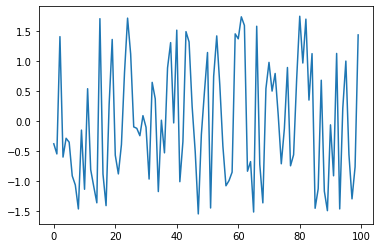

In [ ]:
plt.plot(RT)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y_binarized )
# Stratify = ratio of 0 and 1 is almost same in Test and Train

In [ ]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax_scaler = MinMaxScaler()

In [ ]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [ ]:
np.max(Y_scaled_train), np.min(Y_scaled_train)

(1.0, 0.0)

In [ ]:
Y_scaled_test = minmax_scaler.fit_transform(Y_test.reshape(-1,1))

In [ ]:
scaled_threshold = minmax_scaler.transform(np.array([threshold]).reshape(1,-1))[0][0]

In [ ]:
scaled_threshold

0.6363636363636365

In [ ]:
Y_binarized_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()

In [ ]:
Y_binarized_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
Y_binarized_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

In [ ]:
Y_binarized_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

#Train on Real Data

In [ ]:
sn = SigmoidNeuron()

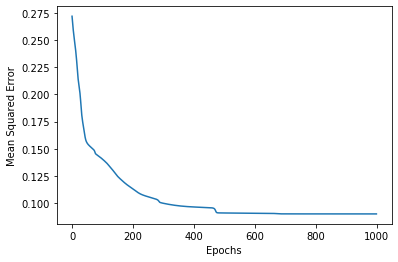

In [ ]:
sn.fit(X_scaled_train, Y_scaled_train, epochs = 1000, learning_rate = 0.0155, display_loss = True)

In [ ]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [ ]:
Y_pred_binarized_train = (Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarized_test = (Y_pred_test > scaled_threshold).astype('int').ravel()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_train = accuracy_score(Y_pred_binarized_train, Y_binarized_train)
accuracy_test = accuracy_score(Y_pred_binarized_test, Y_binarized_test)

In [ ]:
print(accuracy_train, accuracy_test)

0.7294117647058823 0.7093023255813954
